# Analysis of  Spaceship Titanic Data

In [1]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt
spark = SparkSession.builder.appName("Spaceship_Transportation_Analytics").getOrCreate()
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
spark

22/10/13 16:42:49 WARN Utils: Your hostname, adnan-System-Product-Name resolves to a loopback address: 127.0.1.1; using 192.168.1.109 instead (on interface enp2s0)
22/10/13 16:42:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/13 16:42:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df= spark.read.csv("spaceship/train.csv",header=True,inferSchema=True)

In [3]:
import pyspark.pandas as ps
import numpy as np
import pandas as pd
psdf = df.toPandas().set_index("PassengerId")
psdf.drop("Name",axis=1,inplace=True)
psdf.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [4]:
psdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 823.5+ KB


In [5]:
psdf.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
psdf.value_counts()

HomePlanet  CryoSleep  Cabin     Destination    Age   VIP    RoomService  FoodCourt  ShoppingMall  Spa   VRDeck  Transported
Europa      True       C/25/S    55 Cancri e    30.0  False  0.0          0.0        0.0           0.0   0.0     True           2
Mars        True       F/1553/P  TRAPPIST-1e    3.0   False  0.0          0.0        0.0           0.0   0.0     True           2
Europa      True       B/19/S    55 Cancri e    18.0  False  0.0          0.0        0.0           0.0   0.0     True           2
Mars        False      F/1050/P  TRAPPIST-1e    4.0   False  0.0          0.0        0.0           0.0   0.0     True           2
Earth       True       G/577/P   TRAPPIST-1e    0.0   False  0.0          0.0        0.0           0.0   0.0     True           2
                                                                                                                               ..
            False      G/556/S   TRAPPIST-1e    29.0  False  0.0          4.0        0.0       

In [7]:
np.sum(psdf.isna())

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [8]:
psdf.HomePlanet = psdf.HomePlanet.fillna("UnkownPlanet")
np.sum(psdf.HomePlanet.isna())

0

In [9]:
psdf["CryoSleep"].fillna(False,inplace=True)
np.sum(psdf["CryoSleep"].isna())

0

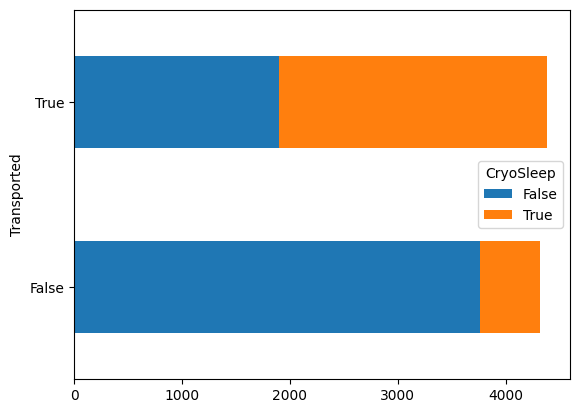

In [10]:
pd.crosstab(index=psdf["Transported"],columns=psdf["CryoSleep"]).plot.barh(stacked=True)
plt.show()

In [11]:
psdf["Cabin"] = psdf.Cabin.map(lambda x:x[0] if x else "H")
psdf['Destination'].fillna(psdf['Destination'].mode()[0],inplace=True)

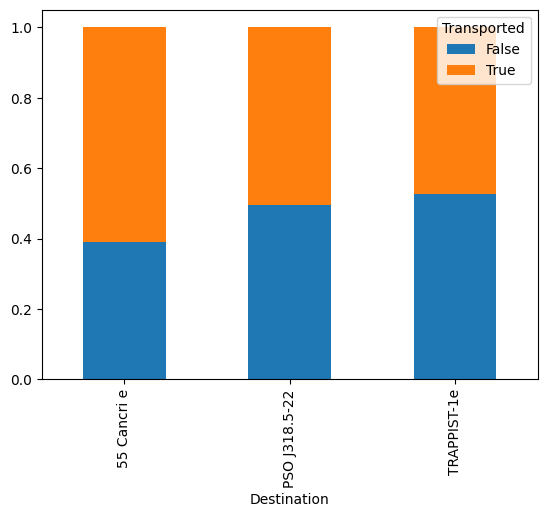

In [12]:
temp = pd.crosstab(index=psdf["Destination"],columns=psdf["Transported"])
temp.div(np.sum(temp,axis=1),axis=0).plot.bar(stacked=True)
plt.show()

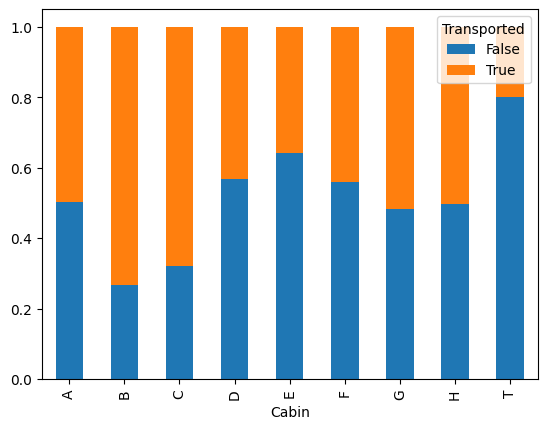

In [13]:
temp = pd.crosstab(index=psdf["Cabin"],columns=psdf["Transported"])
temp.div(np.sum(temp,axis=1),axis=0).plot.bar(stacked=True)
plt.show()

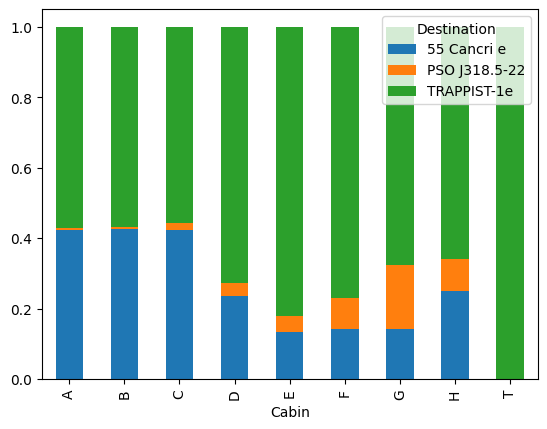

In [14]:
temp = pd.crosstab(index=psdf["Cabin"],columns=psdf["Destination"])
temp.div(np.sum(temp,axis=1),axis=0).plot.bar(stacked=True)
plt.show()

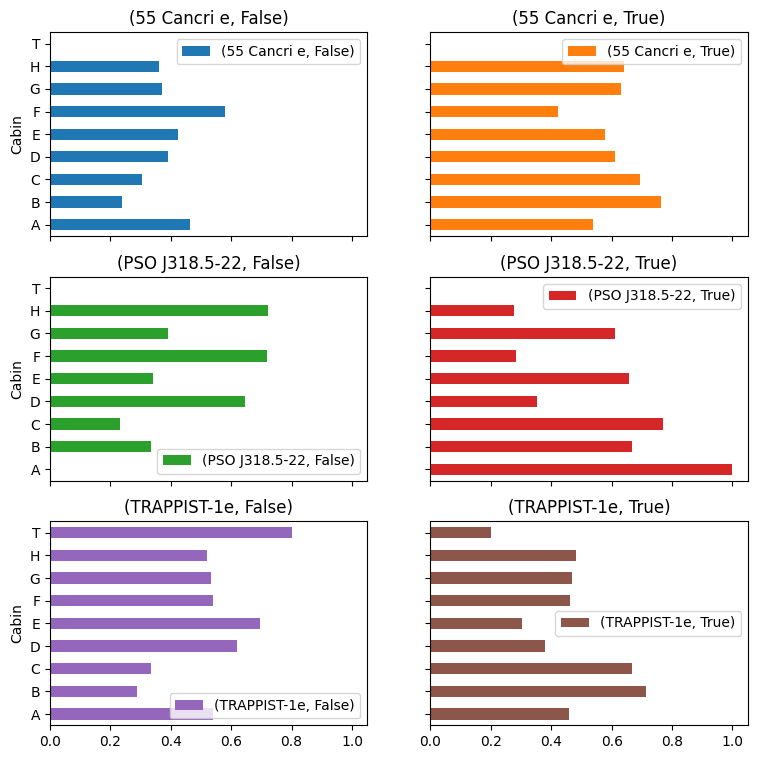

In [15]:
temp = pd.crosstab(index=psdf["Cabin"],columns=[psdf['Transported'],psdf["Destination"]]).swaplevel(axis=1).sort_index(axis=1)
temp = temp.divide(temp.groupby(axis=1,level=0).sum(),level=0)
temp.plot(kind='barh',subplots=True,layout=(3,2),figsize=(9,9),sharey=True)
plt.show()

### It can be Infered from above graph Cabin B and C are more dangerous regardless of Destination and people going on Trappist less likely  to select A, B and C i.e Trappist people who doesn't select  Cabin A, B and C have lower chance of being teleported

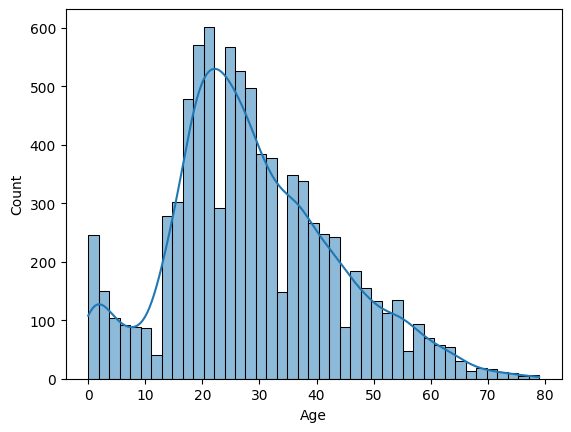

In [16]:
sns.histplot(psdf["Age"],kde=True)
plt.show()

In [17]:
psdf["Age"].fillna(psdf["Age"].median(),inplace=True)
np.sum(psdf["Age"].isna())

0

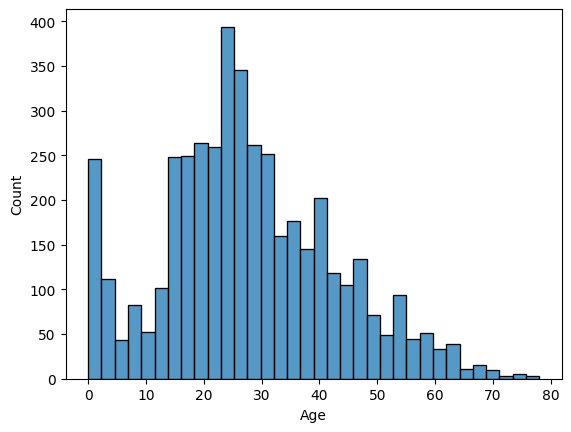

In [18]:
sns.histplot(psdf.loc[psdf["Transported"]==True]["Age"])
plt.show()

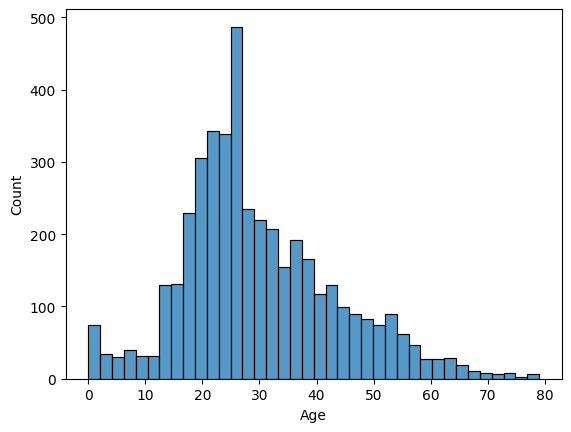

In [19]:
sns.histplot(psdf.loc[psdf["Transported"]==False]["Age"])
plt.show()

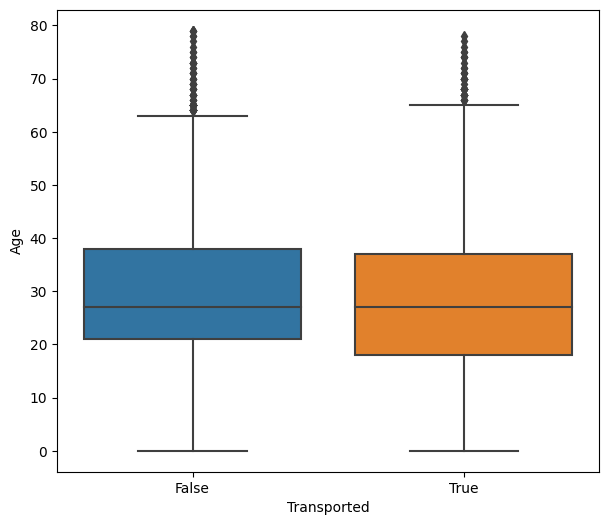

In [20]:
fig,ax= plt.subplots(1,1,figsize=(7,6))
sns.boxplot(psdf,x="Transported",y="Age",ax=ax)
plt.show()

##### From above it can be seen that small kids have high chance of teleportation

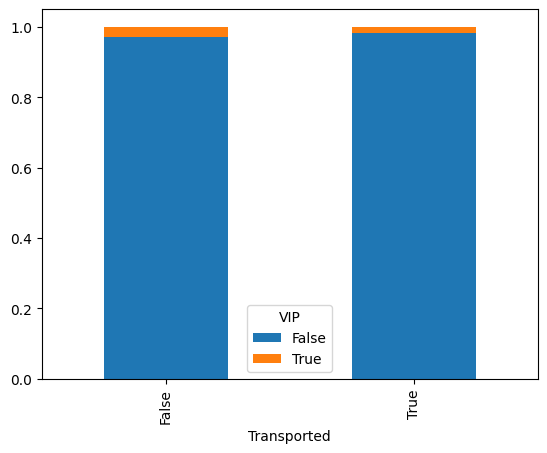

In [21]:
psdf["VIP"].fillna(False,inplace=True)
temp = pd.crosstab(index=psdf["Transported"],columns=psdf["VIP"])
temp.div(np.sum(temp,axis=1),axis=0).plot.bar(stacked=True)
plt.show()

### There doesn't seems to be much relation between transported and VIP feature

In [22]:
temp = psdf.loc[psdf["VIP"]==True][["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
temp.sum()/temp.count()

RoomService      473.615385
FoodCourt       1811.393782
ShoppingMall     247.726804
Spa              760.710660
VRDeck          1234.856410
dtype: float64

In [23]:
temp = psdf.loc[psdf["VIP"]==False][["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
temp.sum()/temp.count()

RoomService     218.851268
FoodCourt       426.672839
ShoppingMall    171.997708
Spa             300.484903
VRDeck          283.031649
dtype: float64

#### VIP people are much likely to spend on RoomService, FoodCourt, ShoppingMall, Spa and VRDeck than normal people

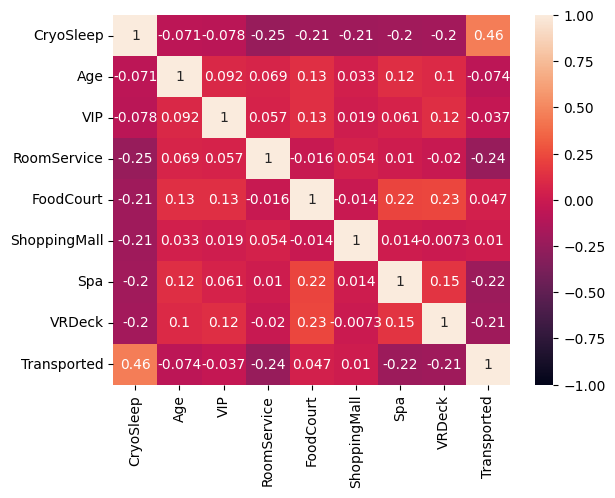

In [24]:
sns.heatmap(psdf.select_dtypes(exclude="object").corr(),annot=True,vmin=-1,vmax=1)
plt.show()

#### Peop

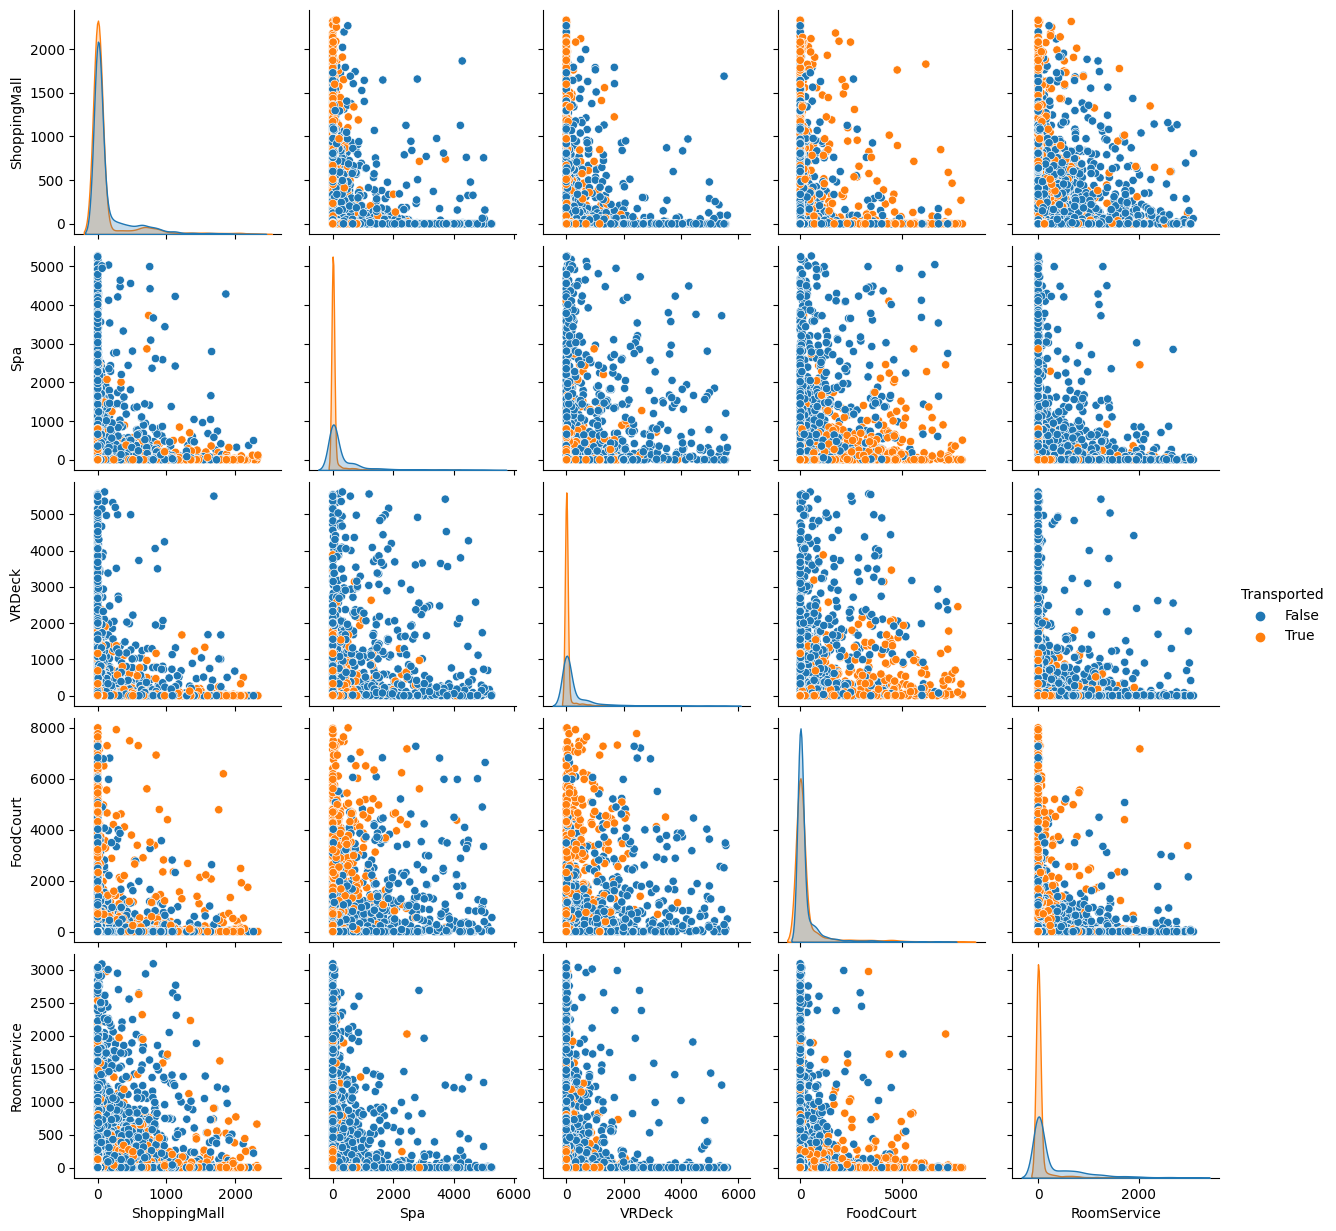

In [25]:
temp = psdf[["ShoppingMall","Spa","VRDeck","FoodCourt","Transported","RoomService"]]
temp =  temp.loc[
    (temp["ShoppingMall"]<temp["ShoppingMall"].quantile(0.99))
    &(temp["Spa"]<temp["Spa"].quantile(0.99))
    &(temp["VRDeck"]<temp["VRDeck"].quantile(0.99))
    &(temp["FoodCourt"]<temp["FoodCourt"].quantile(0.99))
    &(temp["RoomService"]<temp["RoomService"].quantile(0.99))
]
sns.pairplot(temp,diag_kind="kde",hue="Transported")
plt.show()

#### From above graph we can infer, people that spend more money on Spa, RoomService and VRDeck are likely to be transported and people that spend money on Spa and VRDeck are less likely to spend in ShoppingMall and RoomService